In [58]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'

In [3]:
#anndataA11_sg = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_score_genes.h5ad')
#anndataA12_sg = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_score_genes.h5ad')
#anndataC2_sg = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_score_genes.h5ad') 
#anndataD21_sg = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_score_genes.h5ad')
#anndataA11_tan = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_tangram.h5ad')
#anndataA12_tan = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_tangram.h5ad')
#anndataC2_tan = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_tangram.h5ad')
#anndataD21_tan = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_tangram.h5ad')
#anndataA11_sg.obs['annotation_tangram'] = anndataA11_tan.obs['annotation_tangram']
#anndataA12_sg.obs['annotation_tangram'] = anndataA12_tan.obs['annotation_tangram']
#anndataC2_sg.obs['annotation_tangram'] = anndataC2_tan.obs['annotation_tangram']
#anndataD21_sg.obs['annotation_tangram'] = anndataD21_tan.obs['annotation_tangram']
#anndataA11_sg.uns['tangram'] = anndataA11_tan.uns['tangram']
#anndataA12_sg.uns['tangram'] = anndataA12_tan.uns['tangram']
#anndataC2_sg.uns['tangram'] = anndataC2_tan.uns['tangram']
#anndataD21_sg.uns['tangram'] = anndataD21_tan.uns['tangram']
#anndataA11_sg.write(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all.h5ad')
#anndataA12_sg.write(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all.h5ad')
#anndataC2_sg.write(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all.h5ad')
#anndataD21_sg.write(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all.h5ad')

In [4]:
anndata_objects = []
anndataA11_all = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all.h5ad')
anndataA12_all = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all.h5ad')
anndataC2_all = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all.h5ad') 
anndataD21_all = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all.h5ad')
anndata_objects.append(anndataA11_all)
anndata_objects.append(anndataA12_all)
anndata_objects.append(anndataC2_all)
anndata_objects.append(anndataD21_all)

In [56]:
annotations = ['annotation_score_genes_original_BasicMartin','annotation_own_score_genes_start_iterative_BasicMartin','annotation_own_score_genes_BasicMartin','annotation_score_genes_original_HLMartin','annotation_own_score_genes_start_iterative_HLMartin','annotation_own_score_genes_HLMartin','annotation_score_genes_original_Michiel','annotation_own_score_genes_start_iterative_Michiel','annotation_own_score_genes_Michiel','annotation_score_genes_original_AtlasTop20_temp','annotation_own_score_genes_start_iterative_AtlasTop20_temp','annotation_own_score_genes_AtlasTop20_temp','annotation_tangram']
# reverse order of annotations
names_anno_plot = ['original basic Martin','start score genes basic Martin','end score genes basic Martin','original HL Martin','start score genes HL Martin','end score genes HL Martin','original Michiel','start score genes Michiel','end score genes Michiel','original AtlasTop20','start score genes AtlasTop20','end score genes AtlasTop20','tangram']
samples = ["A11","A12","C2","D21"]

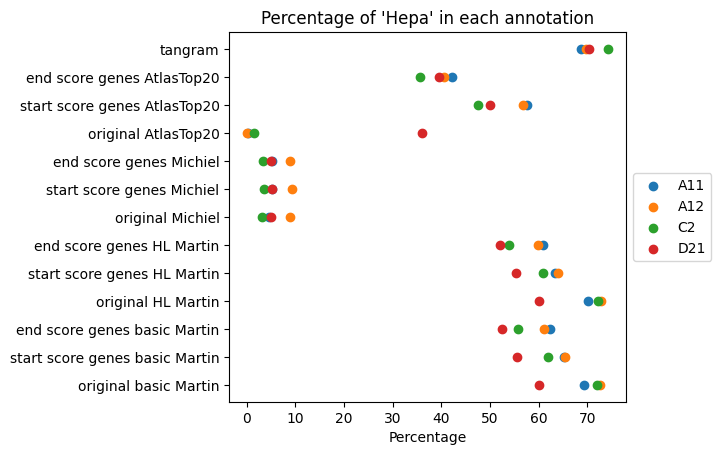

In [57]:
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations,names_anno_plot,chosen_ct='Hepa')

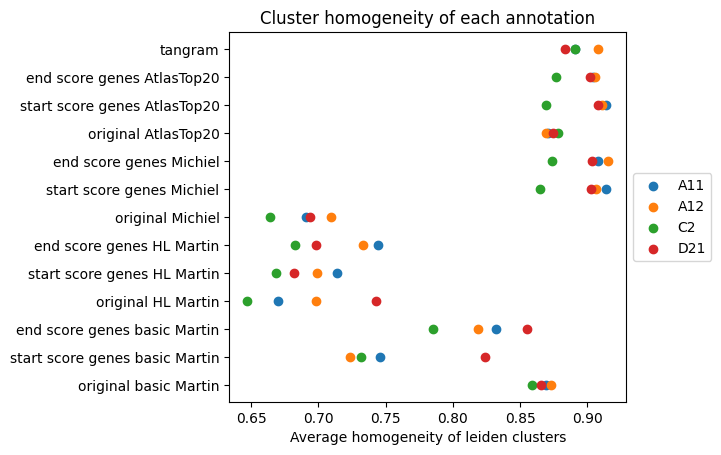

In [52]:
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations,names_anno_plot,drop_cell_types=[])

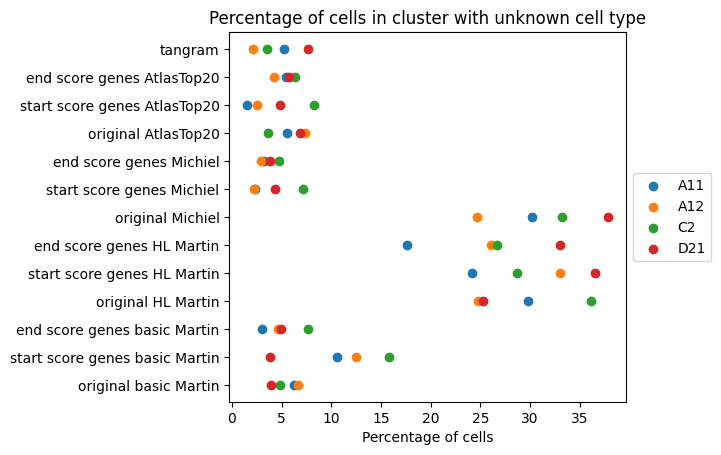

In [53]:
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations,names_anno_plot)

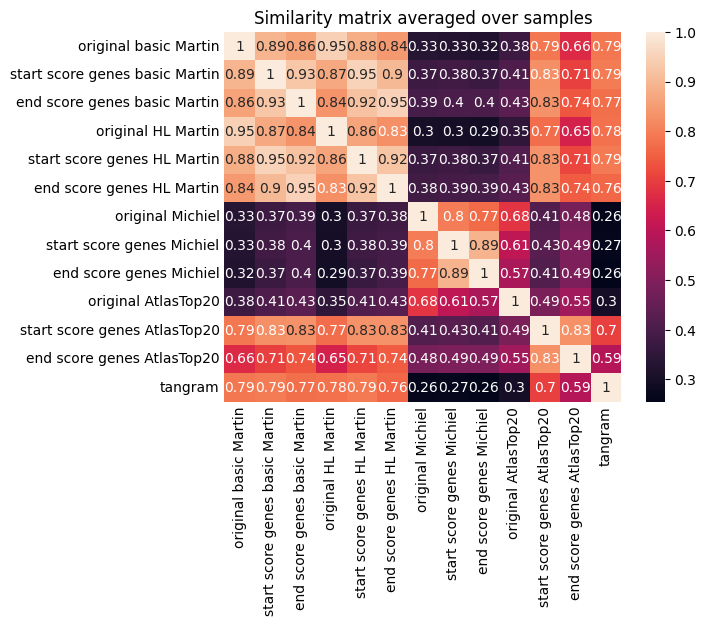

array([[1.        , 0.8933389 , 0.86167557, 0.9459133 , 0.88148972,
        0.84339059, 0.33092759, 0.32709707, 0.31917858, 0.37715569,
        0.78927918, 0.66370155, 0.79040247],
       [0.8933389 , 1.        , 0.92973259, 0.86982022, 0.95325928,
        0.90256445, 0.37328872, 0.38329642, 0.37011888, 0.4073886 ,
        0.82740303, 0.70529396, 0.79487222],
       [0.86167557, 0.92973259, 1.        , 0.83660183, 0.9210533 ,
        0.9499799 , 0.39389   , 0.40275004, 0.40240787, 0.43025598,
        0.83189376, 0.73720219, 0.7739498 ],
       [0.9459133 , 0.86982022, 0.83660183, 1.        , 0.86389748,
        0.82665514, 0.29933634, 0.29858324, 0.29129162, 0.35047894,
        0.77301761, 0.64789099, 0.77680644],
       [0.88148972, 0.95325928, 0.9210533 , 0.86389748, 1.        ,
        0.92384363, 0.37134509, 0.37874809, 0.36745923, 0.41445751,
        0.83163109, 0.71366117, 0.7917281 ],
       [0.84339059, 0.90256445, 0.9499799 , 0.82665514, 0.92384363,
        1.        , 0.38290

In [59]:
similarity_matrix_annotations_avg_samples(anndata_objects,annotations,names_anno_plot)